In [1]:
# importing libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Employee_Compensation_SF.csv")

In [3]:
df.columns

Index(['Year Type', 'Year', 'Organization Group Code', 'Organization Group',
       'Department Code', 'Department', 'Union Code', 'Union',
       'Job Family Code', 'Job Family', 'Job Code', 'Job',
       'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries',
       'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits',
       'Total Benefits', 'Total Compensation'],
      dtype='object')

In [4]:
df.rename(columns = {"Total Benefits": "Total_benefits", "Total Compensation": "Total_compensation",
                     "Other Salaries": "Other_salaries", "Employee Identifier": "emp_id",
                    "Total Salary": "total_salary", "Other Benefits": "other_benefits",
                    "Year Type": "year_type", "Job Code": "job_code"}, inplace=True)

In [5]:
df.drop(columns = ["Organization Group Code", "Organization Group", "Union Code", "Union", "emp_id"], inplace = True)

In [6]:
# We only want to include the year_type "Calendar", as the df contains duplicates/overlaps otherwise

df_2 = df[df.values == "Calendar"]

In [122]:
df_2

,year_type,Year,Department Code,Department,Job Family Code,Job Family,job_code,Job,Salaries,Overtime,Other_salaries,total_salary,Retirement,Health/Dental,other_benefits,Total_benefits,Total_compensation,labels
1,Calendar,2013,ART,Arts Commission,1800,"Budget, Admn & Stats Analysis",1844,Senior Management Assistant,84077.11,0.00,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05,Blue collar
2,Calendar,2015,DPH,Public Health,2900,Human Services,2903,Eligibility Worker,9980.17,0.00,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64,Pink collar
8,Calendar,2015,POL,Police,Q000,Police Services,Q060,Lieutenant (Police Department),23112.00,2312.73,20944.16,46368.89,4183.12,1911.46,68.84,6163.42,52532.31,Pink collar
12,Calendar,2015,REC,Recreation and Park Commission,3400,Agriculture & Horticulture,3422,Park Section Supervisor,80357.00,5612.97,7.90,85977.87,16562.14,12424.50,7091.69,36078.33,122056.20,Blue collar
15,Calendar,2014,ADM,General Services Agency - City Admin,1700,Computer Operatns & Repro Svcs,1777,Media/Security Sys Spec,92530.82,0.00,13412.58,105943.40,20224.21,13054.94,8450.17,41729.32,147672.72,Blue collar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291815,Calendar,2013,AIR,Airport Commission,0900,Management,0942,Manager VII,178013.70,0.00,0.00,178013.70,34106.09,12918.24,17642.10,64666.43,242680.13,White collar
291820,Calendar,2015,CSS,Child Support Services,8100,Legal & Court,8159,Child Support Officer III,93281.01,0.00,624.00,93905.01,19354.57,12424.50,7742.87,39521.94,133426.95,Blue collar
291822,Calendar,2014,DPH,Public Health,2300,Nursing,P103,Special Nurse,13941.91,0.00,223.47,14165.38,0.00,1223.27,1096.69,2319.96,16485.34,Pink collar
291823,Calendar,2015,DPH,Public Health,2900,Human Services,2930,Psychiatric Social Worker,78865.86,0.00,0.00,78865.86,16223.73,12352.82,6418.95,34995.50,113861.36,Blue collar


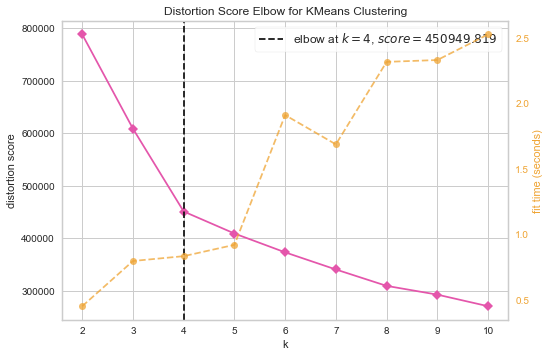

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
# Creating elbow plot to decide amount of clusters

X = df_2.select_dtypes("number")
pipe = make_pipeline(StandardScaler(), KElbowVisualizer(KMeans()))
pipe.fit(X)
pipe[1].show()

## Creating our pipeline

In [7]:
scaler = StandardScaler()

cluster = KMeans(4)

pipe = make_pipeline(scaler, cluster)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4))])

In [8]:
pipe["kmeans"].labels_

array([2, 1, 1, ..., 1, 2, 1], dtype=int32)

In [9]:
df_2["labels"] = pipe["kmeans"].labels_

/var/folders/lz/k_d_bqg17c1b10f10n3wv1l00000gn/T/ipykernel_6290/1639065206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["labels"] = pipe["kmeans"].labels_


### Creating a df with the averages

In [10]:
means = df_2.groupby("labels").mean()

In [11]:
means.reset_index(inplace = True)

In [12]:
means.columns

Index(['labels', 'Year', 'Salaries', 'Overtime', 'Other_salaries',
       'total_salary', 'Retirement', 'Health/Dental', 'other_benefits',
       'Total_benefits', 'Total_compensation'],
      dtype='object')

## Visualization

In [13]:
colors = ["#E456AB", "#EFA433", "#E45664", "#ABE456"]

sns.set_palette(sns.color_palette(colors))
sns.color_palette()

[(0.8941176470588236, 0.33725490196078434, 0.6705882352941176),
 (0.9372549019607843, 0.6431372549019608, 0.2),
 (0.8941176470588236, 0.33725490196078434, 0.39215686274509803),
 (0.6705882352941176, 0.8941176470588236, 0.33725490196078434)]

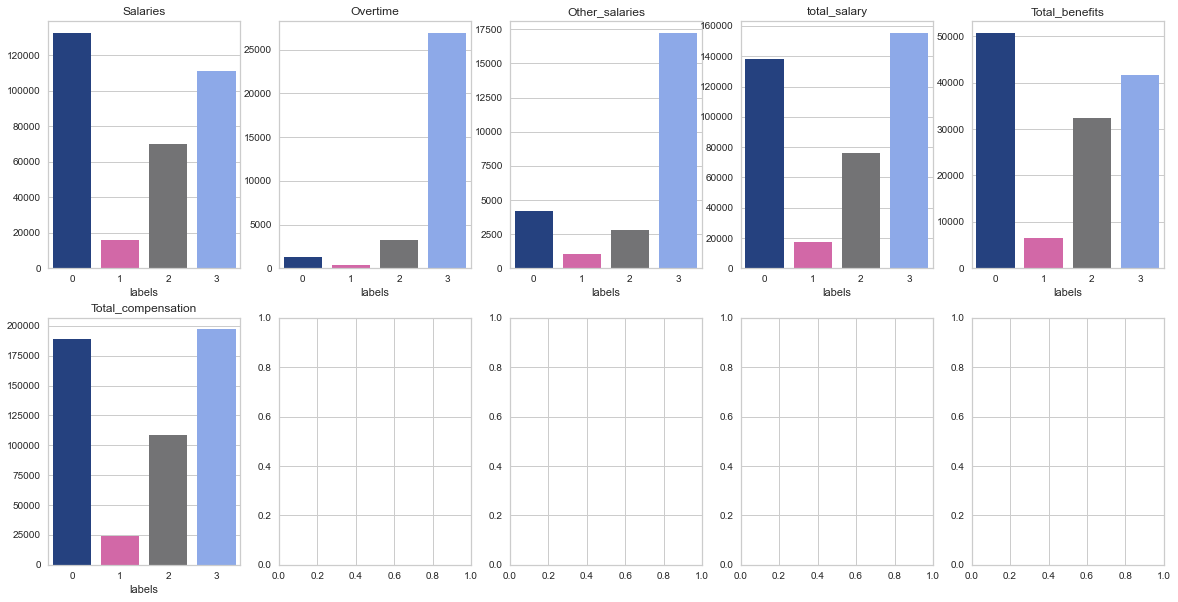

In [140]:
var_list = """
    Salaries
    Overtime
    Other_salaries
    total_salary
    Total_benefits
    Total_compensation
    """.split()

rows = math.ceil(len(var_list)/3)

fig, axs = plt.subplots(nrows = rows, ncols= 5, figsize=(20, 5*rows))

for i, ax in zip(var_list, axs.flat):
    sns.barplot(data = means, x = "labels", y = i, ax=ax)
    ax.set(xlabel = 'labels', ylabel = '', title = i)
    
for i in axs.flat[::-1][:rows*3-len(var_list)]:
    i.set_axis_off()

plt.show()

In [95]:
ben_type = []

ben_type.append(df_2['Retirement'])



In [96]:
ben_type.append(df_2['Health/Dental'])
ben_type.append(df_2["other_benefits"])

In [99]:
# dataframe out of types of benefits
pd.DataFrame(ben_type).T

,Retirement,Health/Dental,other_benefits
1,16587.30,12457.73,6931.91
2,0.00,2254.93,835.11
8,4183.12,1911.46,68.84
12,16562.14,12424.50,7091.69
15,20224.21,13054.94,8450.17
...,...,...,...
291815,34106.09,12918.24,17642.10
291820,19354.57,12424.50,7742.87
291822,0.00,1223.27,1096.69
291823,16223.73,12352.82,6418.95


## Labelling the clusters

This labelling was made manually by inspecting the different types of job titles included in each cluster. The definitions of white/blue/pink jobs is not static and may be subject to own interpretation; however, these felt the most fitting for each cluster.

In [ ]:
df_2.loc[df_2.labels == 0]["Job"].value_counts() # white collar jobs
df_2.loc[df_2.labels == 3]["Job"].value_counts() # blue-white collar jobs
df_2.loc[df_2.labels == 1]["Job"].value_counts() # pink collar jobs
df_2.loc[df_2.labels == 2]["Job"].value_counts() # blue collar jobs

In [ ]:
df_2.labels.replace({0: "White collar", 1: "Pink collar", 2: "Blue collar", 3: "Blue/white collar"}, inplace=True)

<AxesSubplot:xlabel='labels', ylabel='Total_benefits'>

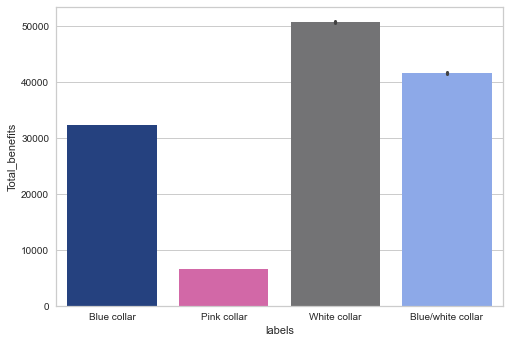

In [82]:
sns.barplot(data = df_2, x = "labels", y = "Total_benefits")

In [67]:
colors = ["#163B8E", "#E456AB", "#737375", "#7EA3F7"]

sns.set_palette(sns.color_palette(colors))
sns.color_palette()

[(0.08627450980392157, 0.23137254901960785, 0.5568627450980392),
 (0.8941176470588236, 0.33725490196078434, 0.6705882352941176),
 (0.45098039215686275, 0.45098039215686275, 0.4588235294117647),
 (0.49411764705882355, 0.6392156862745098, 0.9686274509803922)]

In this graph, we can see the total salary compared to the amount of that salary being overtime. For blue/white collar jobs, we can see that the total salary generally increased as more overtime was made, whereas for the white collar jobs, total salary increased without overtime taking place.

Text(0, 0.5, 'Amount of total salary being overtime')

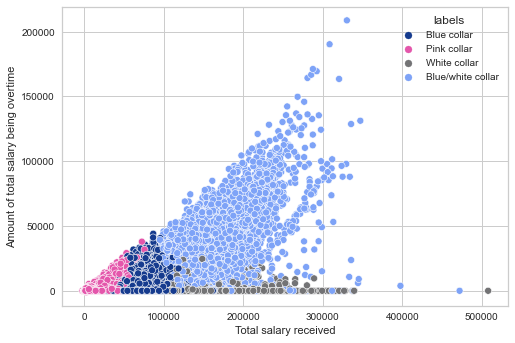

In [69]:
sns.scatterplot(data = df_2, x = "total_salary", y = "Overtime", hue = "labels")
plt.xlabel("Total salary received")
plt.ylabel("Amount of total salary being overtime")

Text(0, 0.5, 'Amount of total benefits going to health/dental insurance')

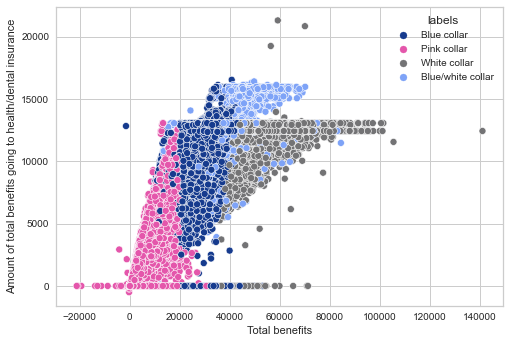

In [120]:
sns.scatterplot(data = df_2, x = "Total_benefits", y = "Health/Dental", hue = "labels")
plt.xlabel("Total benefits")
plt.ylabel("Amount of total benefits going to health/dental insurance")

Below is an extremely simple graph just to illustrate what the other graphs show, namely the distribution of compensation vs the type of collar the job is. This clarifies further the logic behind the clustering made.

Text(0, 0.5, 'Total compensation')

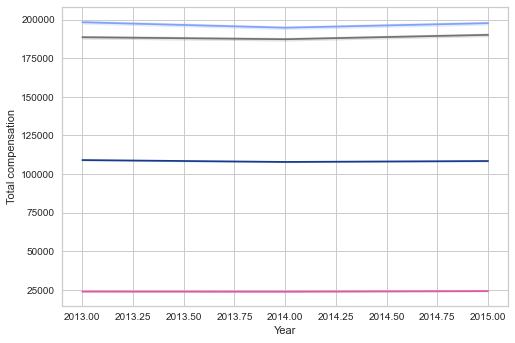

In [131]:
sns.lineplot(data = df_2, x = "Year", y = "Total_compensation", hue = "labels", legend = None)
plt.xlabel("Year")
plt.ylabel("Total compensation")

Text(0, 0.5, 'Amount of total benefits going to health/dental insurance')

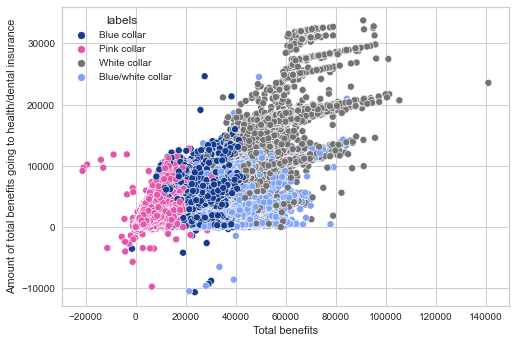

In [121]:
sns.scatterplot(data = df_2, x = "Total_benefits", y = "other_benefits", hue = "labels")
plt.xlabel("Total benefits")
plt.ylabel("Amount of total benefits going to health/dental insurance")

In [101]:
df_2.describe()

,Year,Salaries,Overtime,Other_salaries,total_salary,Retirement,Health/Dental,other_benefits,Total_benefits,Total_compensation
count,124316.000000,124316.000000,124316.000000,124316.000000,124316.000000,124316.000000,124316.000000,124316.000000,124316.000000,124316.000000
mean,2014.024816,63582.638279,4395.703582,3824.058607,71802.400467,13211.815503,8967.382718,4659.555543,26838.753764,98641.154231
std,0.816200,44479.463325,11055.864453,7784.833678,52014.719398,9845.698935,4868.870236,3756.617783,16796.651935,67558.551351
min,2013.000000,-2596.000000,-1072.880000,-7058.590000,-2596.000000,-30621.430000,-502.110000,-10636.500000,-21295.150000,-8965.960000
25%,2013.000000,24224.000000,0.000000,0.000000,26283.407500,4006.605000,4512.740000,1637.397500,10213.475000,37452.127500
50%,2014.000000,62501.735000,0.000000,721.810000,67940.750000,13383.415000,11961.330000,4367.660000,30564.300000,98484.445000
75%,2015.000000,93459.955000,2749.845000,4705.857500,103354.002500,19860.362500,12918.240000,6822.660000,39053.495000,142559.860000
max,2015.000000,507831.600000,208668.820000,342802.630000,507831.600000,105052.980000,21291.180000,33753.870000,141043.640000,648875.240000
